In [10]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf,pacf
from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6

import warnings
warnings.filterwarnings('ignore')

In [11]:
data = pd.read_csv('C:/Users/sriji/MachineLearning/DemoDatasets/Lesson 8/monthly-beer-production-in-austr.csv')

In [12]:
data.head()

,Month,Monthly beer production in Australia
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
Month                                   476 non-null object
Monthly beer production in Australia    476 non-null float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [14]:
data['Month'] = data['Month'].apply(lambda x: dt(int(x[:4]),int(x[5:]),15))

data = data.set_index('Month')

data.head()

,Monthly beer production in Australia
Month,
1956-01-15,93.2
1956-02-15,96.0
1956-03-15,95.2
1956-04-15,77.1
1956-05-15,70.9


In [15]:
ts = data['Monthly beer production in Australia']

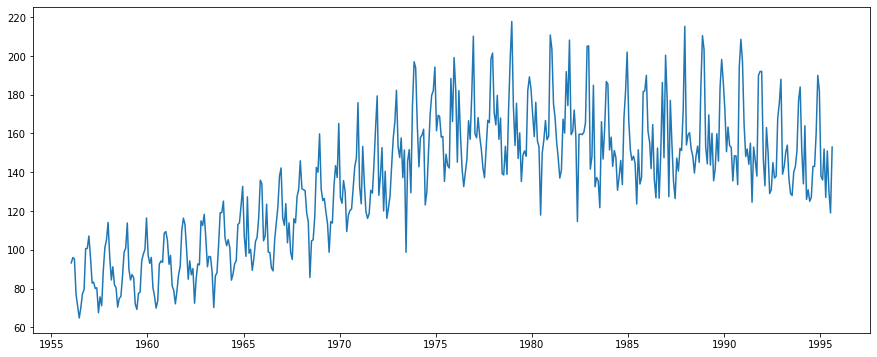

In [16]:
plt.plot(ts)

In [17]:
ts_log = np.log(ts)

In [24]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=52, center=False).mean()
    rolstd = timeseries.rolling(window=52, center=False).std()
    
    orig = plt.plot(timeseries,color='blue',label='Original')
    mean = plt.plot(rolmean,color='red',label='Rolling Mean')
    std = plt.plot(rolstd,color='black',label='Rolling Standard Deviation')
    
    plt.title('Rolling Mean and Standard Deviation')
    
    plt.show(block=False)
    
    print('Results of Dickey Fuller Test:')
    
    dfTest = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dfTest[0:4],index=['Test-Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dfTest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

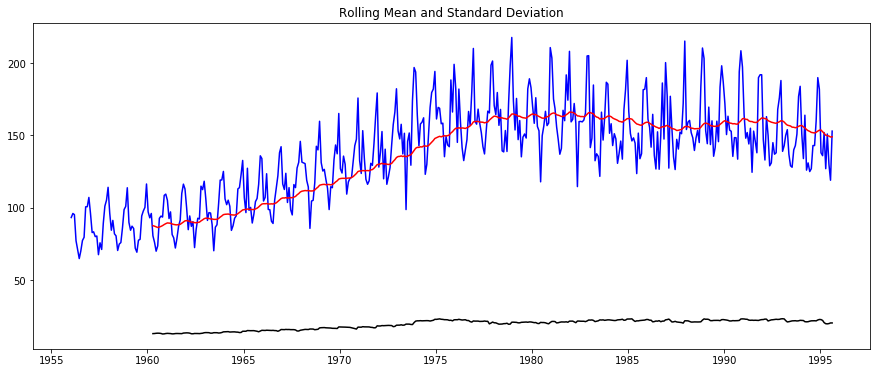

Results of Dickey Fuller Test:
Test-Statistic                  -2.282661
p-value                          0.177621
#Lags Used                      17.000000
Number of Observations Used    458.000000
Critical Value (1%)             -3.444709
Critical Value (5%)             -2.867871
Critical Value (10%)            -2.570142
dtype: float64


In [25]:
test_stationarity(data['Monthly beer production in Australia'])

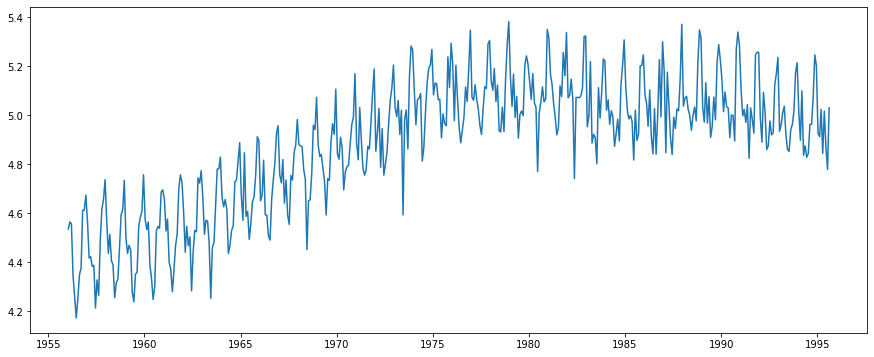

In [26]:
 plt.plot(ts_log)

In [27]:
moving_average = ts_log.rolling(window=12).mean()
moving_std = ts_log.rolling(window=12).std()

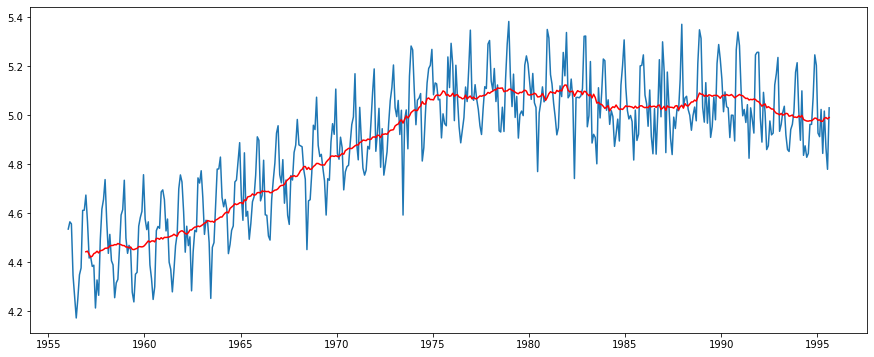

In [28]:
plt.plot(ts_log)
plt.plot(moving_average,color='red')

In [29]:
ts_log_mv_diff = ts_log - moving_average
ts_log_mv_diff.head(12)

ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head(10)

Month
1956-12-15    0.231830
1957-01-15    0.118994
1957-02-15   -0.015558
1957-03-15    0.001590
1957-04-15   -0.041908
1957-05-15   -0.047399
1957-06-15   -0.225688
1957-07-15   -0.117442
1957-08-15   -0.173166
1957-09-15    0.045062
Name: Monthly beer production in Australia, dtype: float64

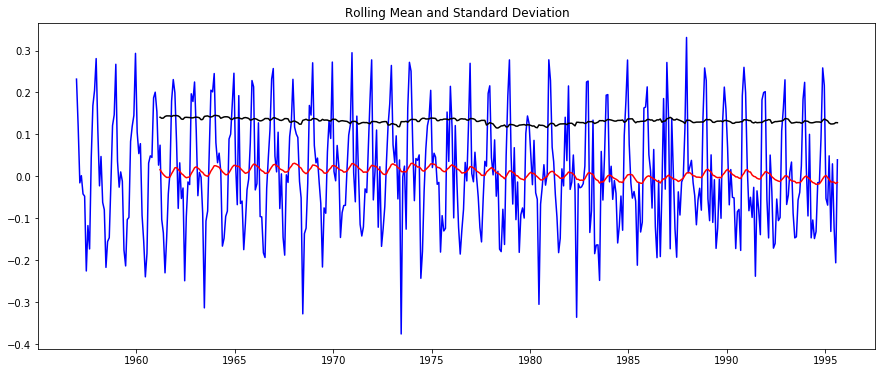

Results of Dickey Fuller Test:
Test-Statistic                  -3.432559
p-value                          0.009898
#Lags Used                      13.000000
Number of Observations Used    451.000000
Critical Value (1%)             -3.444933
Critical Value (5%)             -2.867970
Critical Value (10%)            -2.570195
dtype: float64


In [30]:
test_stationarity(ts_log_mv_diff)